In [19]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [20]:
IMAGE_PATH = 'Bcertificate.jpg'

In [21]:
reader = easyocr.Reader(['ne','en'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[542, 22], [622, 22], [622, 48], [542, 48]],
  'अनगषीन१२',
  0.053092813958528794),
 ([[502, 46], [658, 46], [658, 74], [502, 74]],
  'निगण ७ शीग मा्ननिास',
  0.02318724124864924),
 ([[453, 67], [711, 67], [711, 106], [453, 106]],
  'रेषात गरकाग ( Gavrament nl Nrral )',
  0.07009180673153334),
 ([[374, 91], [604, 91], [604, 122], [374, 122]],
  'नशानीए एगीग्गपिण्ग।ीmो कार्पापण',
  0.008190190450641177),
 ([[611, 107], [655, 107], [655, 125], [611, 125]],
  'ODTlte',
  0.02480013772218431),
 ([[652, 109], [786, 109], [786, 133], [652, 133]],
  'ol Nocal IMrglatrer )',
  0.03098346647309506),
 ([[454, 120], [710, 120], [710, 152], [454, 152]],
  'पष्ठा #४ पोग्ा२ा गहानगरपातिफा',
  0.06517593816757243),
 ([[421, 147], [741, 147], [741, 184], [421, 184]],
  'WWard Nn s Tohhara Mrlropolitan Clly)',
  0.3403986458975338),
 ([[332, 162], [828, 162], [828, 213], [332, 213]],
  'कास्की जिप्ता KKasal Dhatriet गण्डको प्रदेशा Kfandakl Proviner)',
  0.09668963004667273),
 ([[427, 211], [718, 211]

In [22]:
result[20]

([[70, 584], [390, 584], [390, 616], [70, 616]],
 'स्थापी ठेगानाः पोखरा महानगरपालिका वडा',
 0.5535849250131445)

In [23]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [24]:
for i in result:
    print(result)

[([[542, 22], [622, 22], [622, 48], [542, 48]], 'अनगषीन१२', 0.053092813958528794), ([[502, 46], [658, 46], [658, 74], [502, 74]], 'निगण ७ शीग मा्ननिास', 0.02318724124864924), ([[453, 67], [711, 67], [711, 106], [453, 106]], 'रेषात गरकाग ( Gavrament nl Nrral )', 0.07009180673153334), ([[374, 91], [604, 91], [604, 122], [374, 122]], 'नशानीए एगीग्गपिण्ग।ीmो कार्पापण', 0.008190190450641177), ([[611, 107], [655, 107], [655, 125], [611, 125]], 'ODTlte', 0.02480013772218431), ([[652, 109], [786, 109], [786, 133], [652, 133]], 'ol Nocal IMrglatrer )', 0.03098346647309506), ([[454, 120], [710, 120], [710, 152], [454, 152]], 'पष्ठा #४ पोग्ा२ा गहानगरपातिफा', 0.06517593816757243), ([[421, 147], [741, 147], [741, 184], [421, 184]], 'WWard Nn s Tohhara Mrlropolitan Clly)', 0.3403986458975338), ([[332, 162], [828, 162], [828, 213], [332, 213]], 'कास्की जिप्ता KKasal Dhatriet गण्डको प्रदेशा Kfandakl Proviner)', 0.09668963004667273), ([[427, 211], [718, 211], [718, 272], [427, 272]], 'जन्म दर्ता प्रमाण

In [25]:
result[20]

([[70, 584], [390, 584], [390, 616], [70, 616]],
 'स्थापी ठेगानाः पोखरा महानगरपालिका वडा',
 0.5535849250131445)

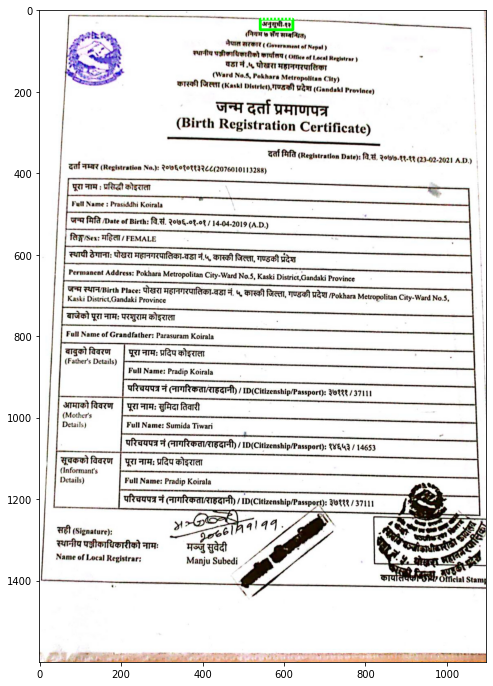

In [26]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

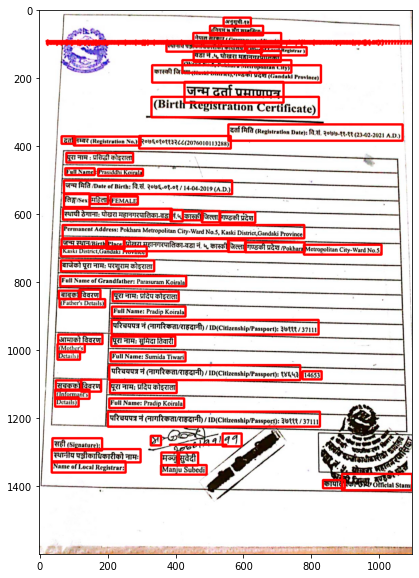

In [27]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(255,0,0),5)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,0,0),2,cv2.LINE_AA)
    
plt.figure(figsize=(10,10))   
plt.imshow(img)
plt.show()

In [28]:
text=''
for i in range(len(result)):
  text=text+result[i][1] + '\n'

ls = ['कार्यालय', 'जन्म दर्ता प्रमाणपत्र', 'Birth Registration Certificate', 'दर्ता मिति', 'Name','Details','Mother','Father']
matches = [match for match in ls if text in match]
 
print('Birth Certificate Verified')

Birth Certificate Verified
